# **Data Understanding**

## **Data Loading**

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory/

  0% 0.00/1.70M [00:00<?, ?B/s]
100% 1.70M/1.70M [00:00<00:00, 136MB/s]


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import zipfile

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
# ekstrak file zip
local_zip = '/content/cryptocurrencypricehistory.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [158]:
dataseat = pd.read_csv('coin_Bitcoin.csv')
dataseat

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


## **Exploratory Data Analysis**

### **Deskripsi Variabel**

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv) variabel dari dataseat adalah sebagai berikut :

* Name : Nama mata uang kripto
* Symbol : Singkatan mata uang kripto
* Date : tanggal pengamatan
* Open : Harga pembukaan pada hari tertentu
* High : Harga tertinggi pada hari tertentu
* Low : Harga terendah pada hari tertentu
* Close : Harga penutupan pada hari tertentu
* Volume : Volume transaksi pada hari tertentu
* Market Cap : Kapitalisasi pasar dalam USD

Setelah memahami deskripsi variabel pada data, langkah selanjutnya adalah mengecek informasi pada dataset



In [159]:
dataseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


Dari output terlihat bahwa :
* Terdapat 3 kolom dengan tipe object, yaitu: Name, Symbol, dan Date.
* Terdapat 6 kolom numerik dengan tipe data float64 yaitu: high, low, open, close, volume, dan marketcap.
* Terdapat 1 kolom dengan tipe data int64, yaitu: SNo. Kolom ini hanya nomor urut pada tabel

Uraian di atas menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai. Selanjutnya, kita perlu mengecek deskripsi statistik dataseat

In [161]:
dataseat.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Uraian diatas memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom. 
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

### **Menagani Missing Value**

Tahap selanjutnya kita harus mengecek apakah terdapat missing value pada dataset, karna missing value akan berperngaruh terhadap performa model namtinya

In [162]:
dataseat.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Uraian diatas menunjukan bahwa tidak terdapat missing value pada dataseat

### **Menangani Outlier**

Pada tahap ini kita perlu mengecek outlier pada dataseat. kita akan menggunakan teknik visualisasi, yaitu jenis boxplot.

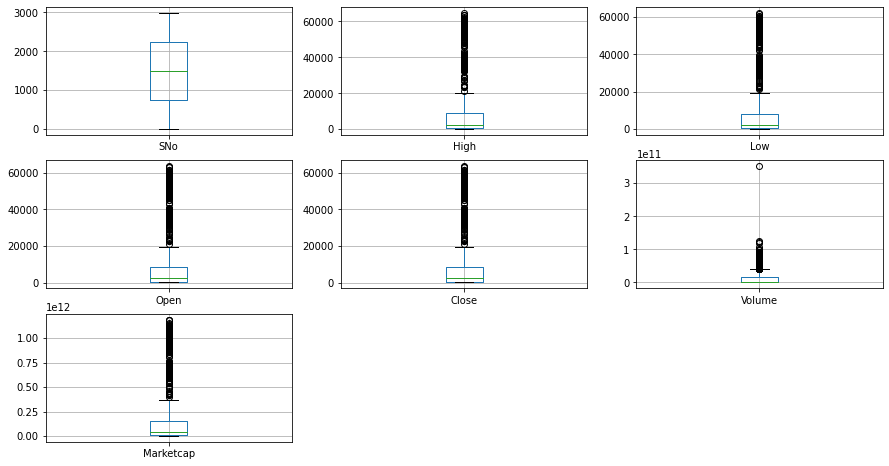

In [163]:
numeric_features = dataseat.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  dataseat.boxplot(column=col)

Dari hasil visualisasi diatas dapat dilihat bahwa banyak terdapat banyak outlier pada masing-masing kolom dataseat kecuali kolom SNo karna kolom tersebut hanyalah kolom nomor urut pada dataseat.

Untuk mengatasi oulier tersebut kita akan mengunakan teknik IQR (Inter Quartile Range) methode yaitu dengan menghapus data yang berada diluar interquartile range. Interquartile merupakan range diantara kuartil pertama(25%) dan kuartil ketiga(75%)

In [164]:
Q1 = dataseat.quantile(.25)
Q3 = dataseat.quantile(.75)

IQR = Q3 - Q1

bot_treshold = Q1 - 1.5 * IQR
top_treshold = Q3 + 1.5 * IQR

dataseat = dataseat[~((dataseat < bot_treshold) | (dataseat > top_treshold)).any(axis=1)]
dataseat.shape

<ipython-input-164-316d29238abf>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataseat = dataseat[~((dataseat < bot_treshold) | (dataseat > top_treshold)).any(axis=1)]


(2696, 10)

### **Univariate Analysis**

Karena target prediksi dari dataset ini ada pada fitur Close yang merupakan harga Bitcoin, jadi hanya fokus menganalisis korelasi data pada feature tersebut. Dari hasil visualisasi data dibawah dapat disimpulkan bahwa peningkatan harga bitcoin sebanding dengan penurunan jumlah sampel data.

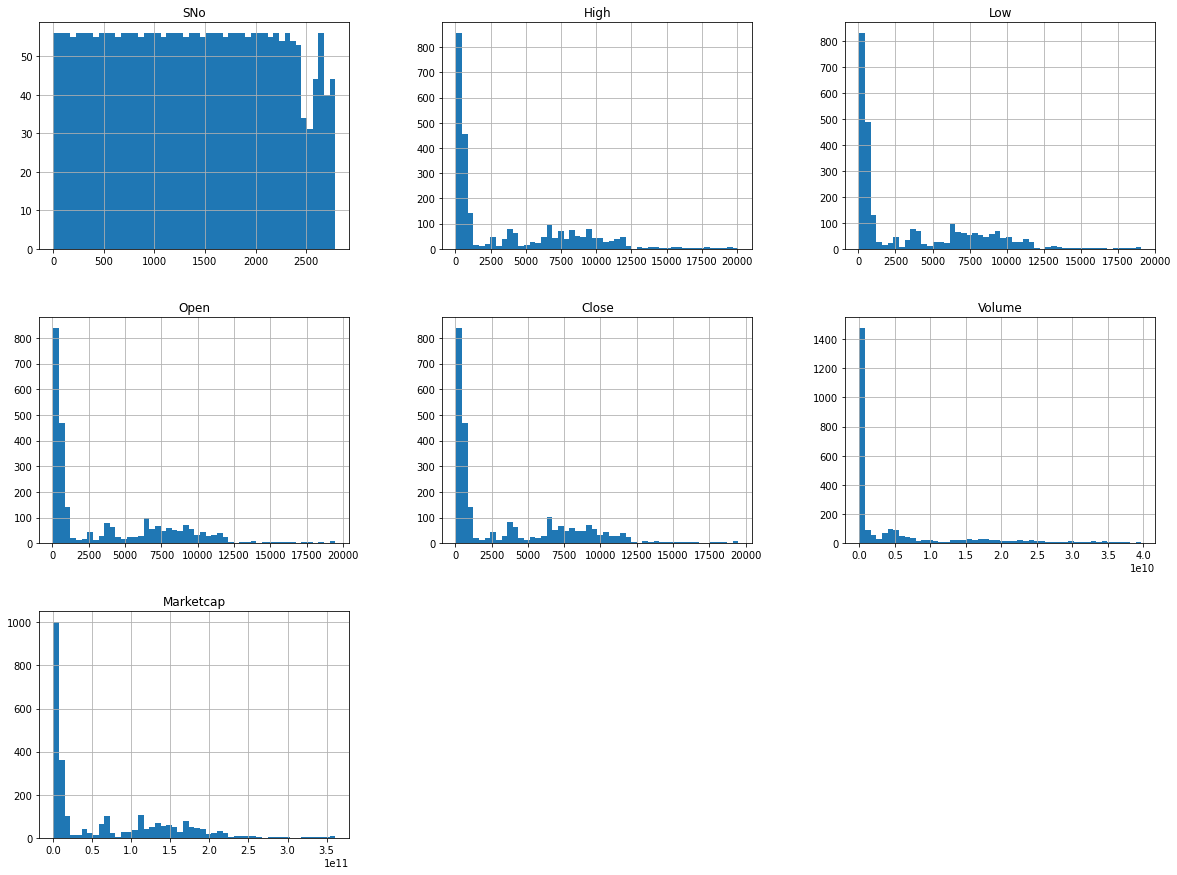

In [165]:
dataseat.hist(bins=50, figsize=(20, 15))
plt.show()

### **Multivariate Analysis**

Jika di lihat dari visualisasi data dibawah. Fitur Close pada sumbu y memiliki korelasi dengan data pada fitur High, Low, Open, dan Marketcap. Korelasi yang terdapat pada data-data tersebut merupakan korelas yang tinggi, sedangkan untuk fitur Volume terlihat memiliki korelasi yang cukup lemah karena sebaran datanya tidak membentuk pola

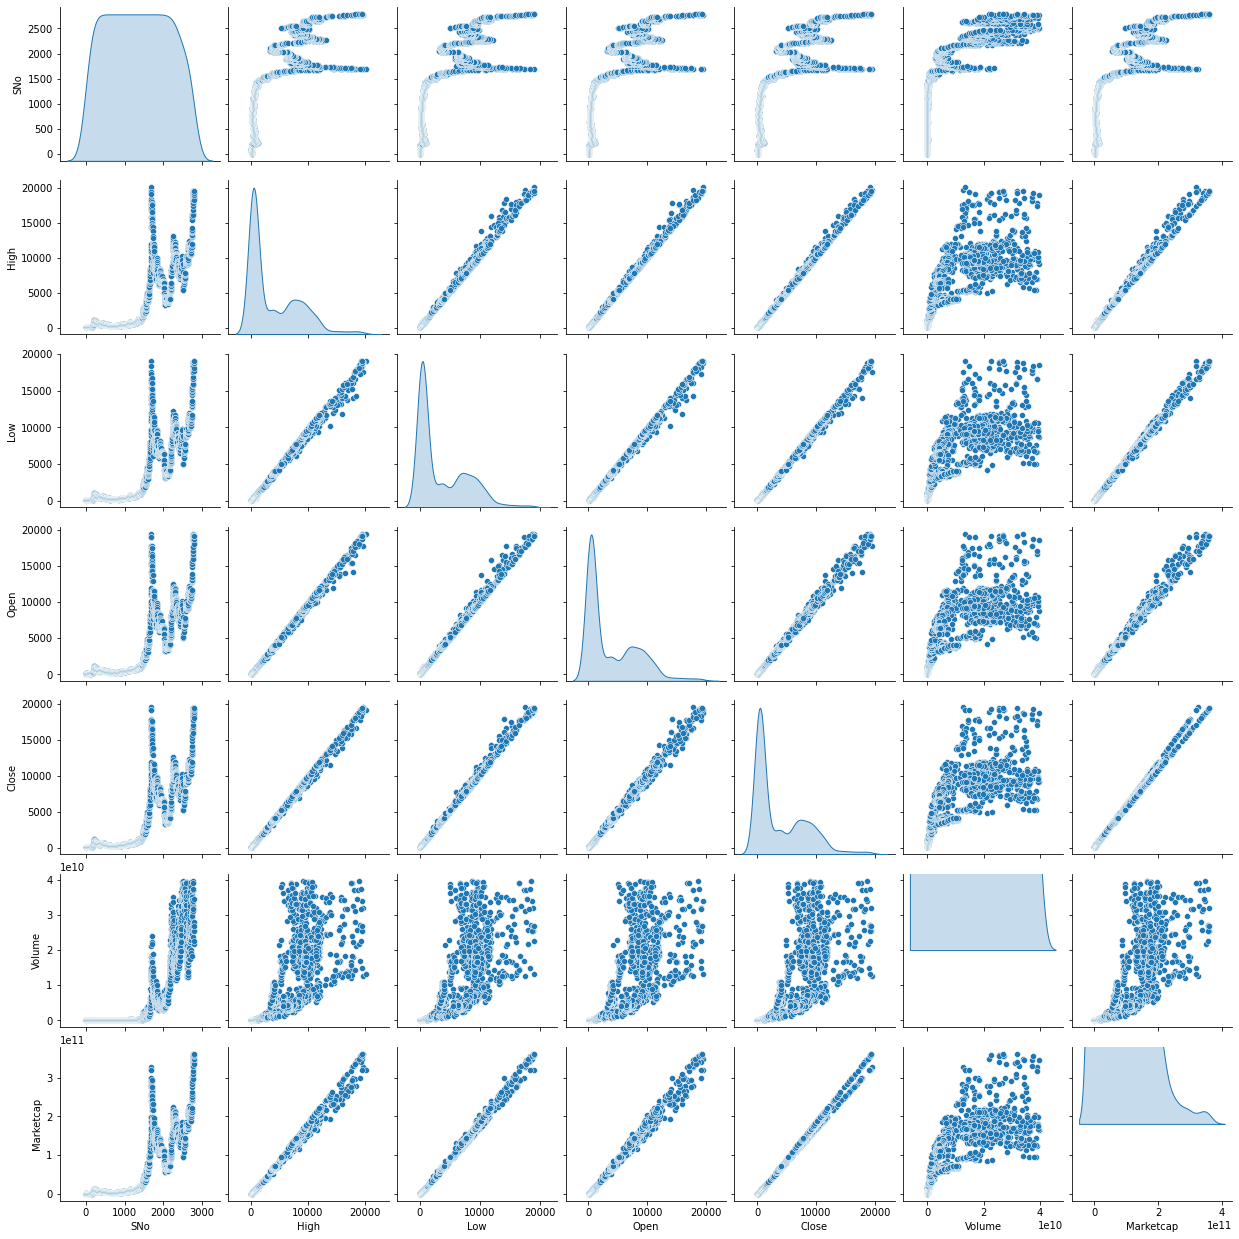

In [166]:
sns.pairplot(dataseat, diag_kind = 'kde')
plt.show()

Untuk lebih jelasnya dapat dilihat melalui visualisasi dibawah yang menunjukkan skor korelasi di tiap fitur dengan fitur Close. Pada fitur High, Low, Open dan Marketcap memiliki skor korelasi yang terbilang tinggi yaitu 1. Sedangkan pada fitur Volume memiliki skor korelasi yang cukup rendah yaitu 0.82. Sehingga fitur Volume ini dapat didrop dari dataset.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

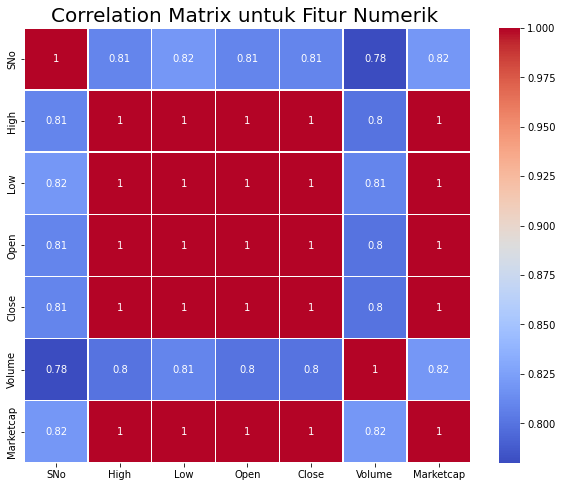

In [167]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataseat.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# **Data Preparation**

## **Seleksi Fitur**

Pada tahap ini kita akan melakukan seleksi fitur, kita akan menghapus kolom yang tidak dibuhkan yaitu SNo, Name, Symbol, Date, Volume dan Marketcap. Hal ini dilakukan agar data yang tidak diperlukan tidak menggangu model



In [168]:
unused_columns = ['SNo', 'Name', 'Symbol', 'Date', 'Volume', 'Marketcap']

dataseat.drop(unused_columns, axis=1, inplace=True)
dataseat

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,High,Low,Open,Close
0,147.488007,134.000000,134.444000,144.539993
1,146.929993,134.050003,144.000000,139.000000
2,139.889999,107.720001,139.000000,116.989998
3,125.599998,92.281898,116.379997,105.209999
4,108.127998,79.099998,106.250000,97.750000
...,...,...,...,...
2783,18268.452845,17619.532389,18263.929255,18058.903347
2784,18919.551228,18046.040724,18051.319990,18803.656870
2785,19381.535773,18734.332888,18806.766479,19142.382534
2786,19305.100443,19012.709408,19144.492460,19246.644341


## **Train-Test-Split**

Pada tahap ini kita akan membagi dataset menjadi data latih (train) dan data uji (test), hal ini merupakan hal yang harus kita lakukan sebelum membuat model.

Proporsi data latih dan data uji yang kita guanakan yaitu 80:20

In [169]:
x = dataseat.drop(['Close'], axis=1).values
y = dataseat['Close'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)

print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 2696
Total # of sample in train dataset: 2156
Total # of sample in test dataset: 540


## **Standarisasi**

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

Pada tahap ini kita akan menggunakan teknik MinMaxScaler. MinMaxScaler mentransformasikan fitur dengan menskalakan setiap fitur ke rentang tertentu

In [171]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# **Model Development**

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian melakukan tuning hyperparameters untuk mendapatkan parameter dengan performa terbaik pada model, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. Support Vector Machine
2. K-Nearest Neighbours
3. Random Forest

In [174]:
models = pd.DataFrame(columns=['train', 'test'],
                      index=['SVR', 'KNN', 'RF'])

## **Tuning Hyperparameters**

Untuk melakukan tuning hyperparameter pada proyek ini menggunakan teknik Grid search. Grid search memungkinkan untuk menguji beberapa parameter sekaligus pada sebuah model. Dengan menerapkan teknik ini kita dapat melihat performa model terbaik dengan parameter tertentu.

### **Support Vector Machine**

In [175]:
svr = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.3, 0.03, 0.003]
}

svr_search = GridSearchCV(
    svr, 
    parameters,
    cv=5, 
    verbose=1,
    n_jobs=6,
)

svr_search.fit(x_train, y_train)
svr_best_params = svr_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


### **K-Nearest Neighbours**

In [176]:
knn = KNeighborsRegressor()
parameters =  {
    'n_neighbors': range(1, 25),
}

knn_search = GridSearchCV(
  knn, 
  parameters, 
  cv=5,
  verbose=1, 
  n_jobs=6,
)

knn_search.fit(x_train, y_train)
knn_best_params = knn_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


### **Random Forest**

In [177]:
rf = RandomForestRegressor()
parameters =  {
    'n_estimators': range(1, 10),
    'max_depth': [16, 32, 64],
}

rf_search = GridSearchCV(
  rf, 
  parameters, 
  cv=5,
  verbose=1,
  n_jobs=6,
)
rf_search.fit(x_train, y_train)
rf_best_params = rf_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


## **Training Model**

### **Support Vector Machine**

In [178]:
svr = SVR(
  C=svr_best_params["C"], 
  gamma=svr_best_params["gamma"], 
  kernel=svr_best_params['kernel']
)                          
svr.fit(x_train, y_train)

SVR(C=100000, gamma=0.3)

### **K-Nearest Neighbours**

In [179]:
knn = KNeighborsRegressor(n_neighbors=knn_best_params["n_neighbors"])
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

### **Random Forest**

In [180]:
rf = RandomForestRegressor(
  n_estimators=rf_best_params["n_estimators"], 
  max_depth=rf_best_params["max_depth"]
)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=32, n_estimators=6)

# **Evaluasi Model**

Pada tahap ini metrik yang akan kita gunakan adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi

sebelum menghitung nilai MSE dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

In [181]:
x_test = scaler.transform(x_test)

Setelah melakukan scaling pada data uji kita evaluasi ketiga model kita dengan metrik MSE

In [182]:
model_dict = {'SVR': svr, 'KNN': knn, 'RF': rf}

for name, model in model_dict.items():
  models.loc[name, 'train'] = mean_squared_error(
    y_true=y_train, 
    y_pred=model.predict(x_train)
  )
  models.loc[name, 'test'] = mean_squared_error(
    y_true=y_test, 
    y_pred=model.predict(x_test)
  ) 

models

,train,test
SVR,8329.656534,7033.950142
KNN,12309.9332,22227.046939
RF,3725.583761,16448.244813


Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart

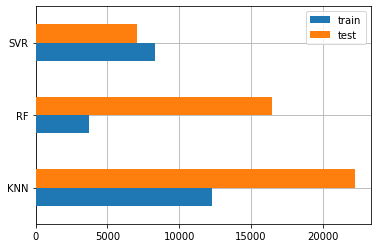

In [183]:
fig, ax = plt.subplots()
models.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Support Vector Machine (SVM) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma K-Nearest Neighbours (KNN) memiliki eror yang paling besar. Model SVR yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga bitcoin.

In [184]:
test_data = x_test.copy()
predictions = {'y_true':y_test}
for name, model in model_dict.items():
  predictions[name] = model.predict(test_data)
 
predictions = pd.DataFrame(predictions)
predictions

,y_true,SVR,KNN,RF
0,4001.739990,4028.660139,4042.230663,4025.473649
1,8300.860352,8000.700543,7988.287405,7953.856608
2,650.879028,651.257182,650.256862,642.647166
3,8293.867741,8064.105303,8062.963169,8020.986062
4,973.817993,997.555087,1037.600420,1037.293162
...,...,...,...,...
535,285.337006,287.623992,288.292428,287.049500
536,595.812988,595.773780,599.422137,599.363668
537,7679.867204,7673.621152,7564.853671,7612.029173
538,6322.690000,6356.264586,6339.260000,6317.678320


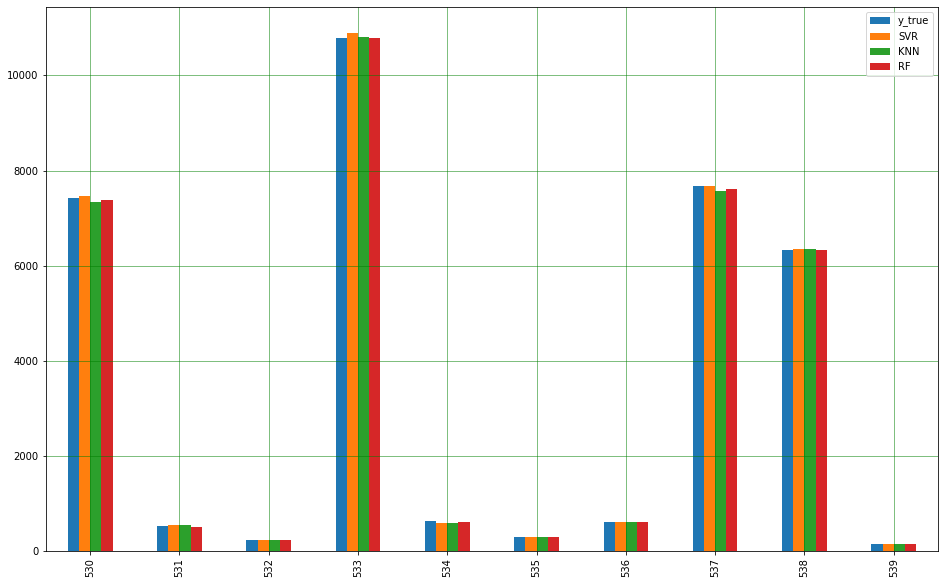

In [185]:
predictions = predictions.tail(10)
predictions.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()